## Desafio 2


Ajuste o classificador baseado na implementação YOLOv3 para anlisar a imagem abaixo (“imagens/oldman.jpg”) de modo a identificar o máximo de objetos em cena. 

<img src="imagens/oldman.jpg">

Após regular a detecção de objetos (utilize o método list_objects da classe utils.py), liste os objetos detectados e a quantidade deles, realizando uma auditoria.

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from utils import *
from darknet import Darknet
from collections import Counter

In [2]:
# Configurações na rede neural YOLOv3
cfg_file = '../cfg/yolov3.cfg'
m = Darknet(cfg_file)

# Pesos pré-treinados
weight_file = '../weights/yolov3.weights'
m.load_weights(weight_file)

# Rótulos de classes
namesfile = '../data/coco.names'
class_names = load_class_names(namesfile)

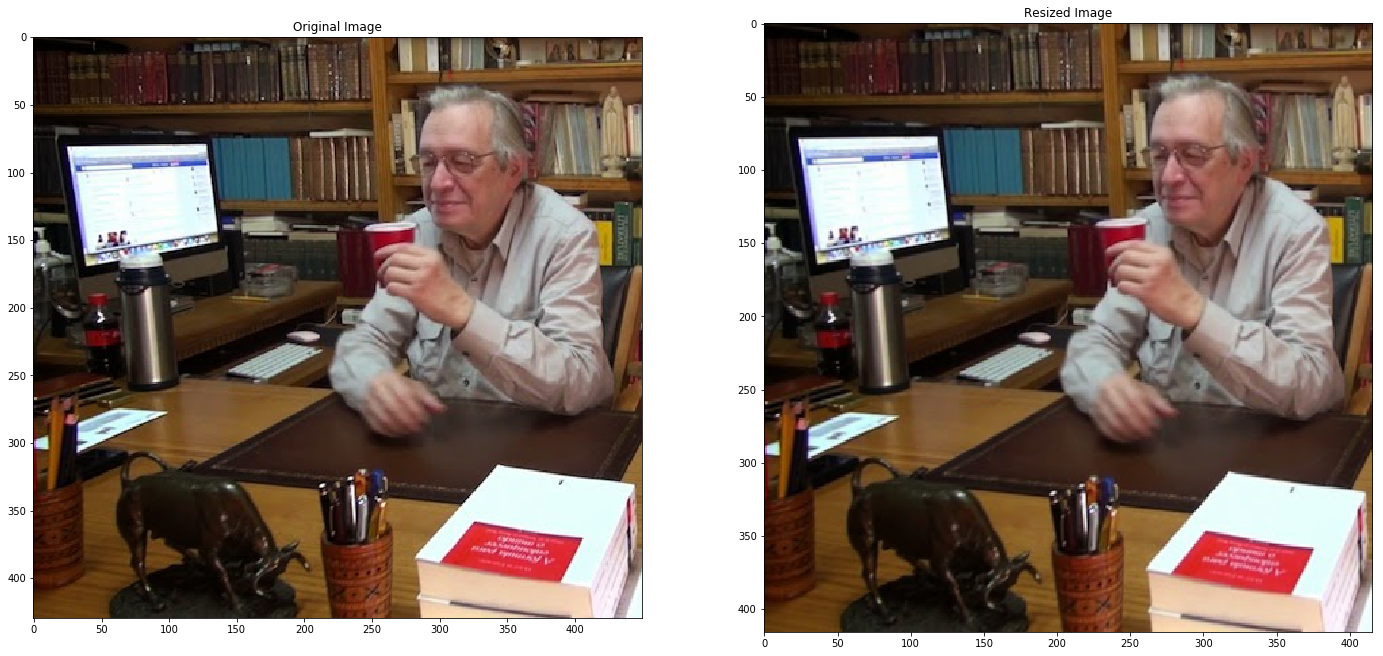

In [3]:
# Tamanho da figura
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Carregando imagem para classificar
img = cv2.imread('imagens/oldman.jpg')

# Convertendo para o espaço de cores RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Redimensionando imagem para ser compatível com a primeira camada da rede neural  
resized_image = cv2.resize(original_image, (m.width, m.height))

# Exibição das imagens
plt.subplot(121)
plt.title('Original Image')
plt.imshow(original_image)
plt.subplot(122)
plt.title('Resized Image')
plt.imshow(resized_image)
plt.show()



It took 2.138 seconds to detect the objects in the image.

Number of Objects Detected: 104 

Objects Found and Confidence Level:

1. person: 1.000000
2. tvmonitor: 0.999893
3. mouse: 0.999999
4. bottle: 0.999939
5. book: 0.999998
6. book: 1.000000
7. book: 1.000000
8. book: 0.999995
9. book: 0.578278
10. cup: 0.999977
11. book: 1.000000
12. keyboard: 0.998397
13. book: 0.999999
14. book: 1.000000
15. book: 1.000000
16. book: 1.000000
17. book: 0.999993
18. book: 1.000000
19. book: 1.000000
20. spoon: 0.863358
21. cup: 0.999989
22. book: 1.000000
23. book: 1.000000
24. book: 1.000000
25. book: 1.000000
26. book: 1.000000
27. book: 1.000000
28. book: 1.000000
29. book: 1.000000
30. book: 1.000000
31. chair: 0.996451
32. book: 1.000000
33. book: 1.000000
34. book: 1.000000
35. book: 1.000000
36. book: 1.000000
37. book: 1.000000
38. book: 1.000000
39. book: 1.000000
40. book: 1.000000
41. book: 1.000000
42. book: 0.999999
43. book: 1.000000
44. book: 1.000000
45. chair: 0.999751
46. boo

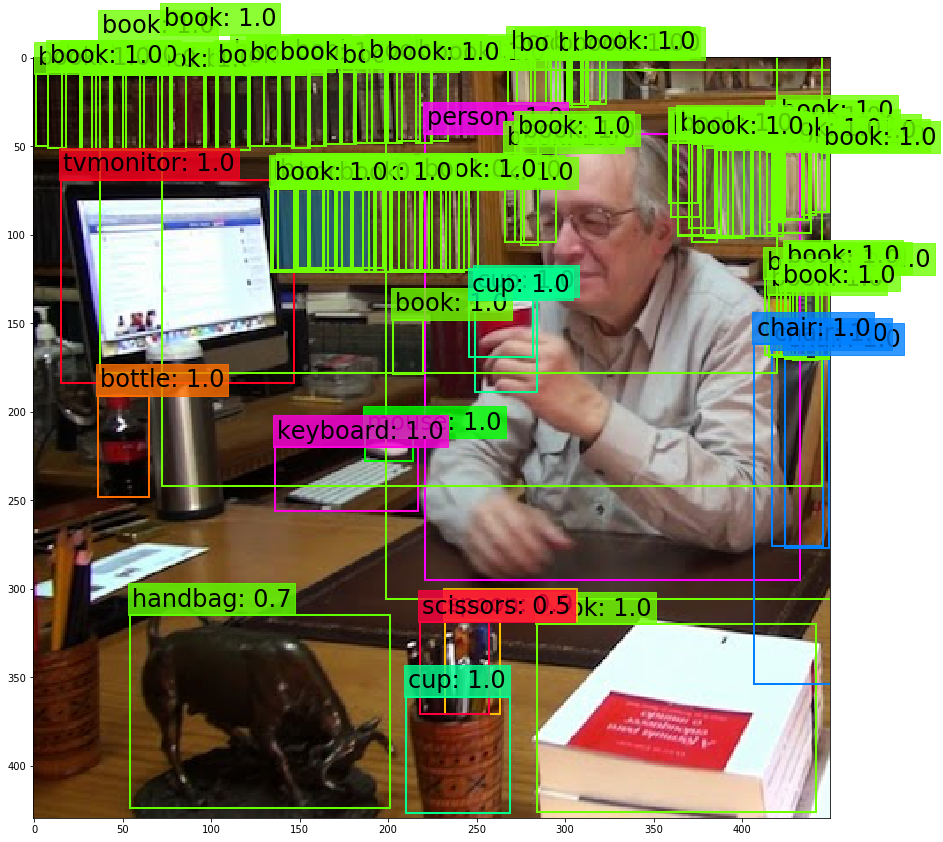

In [6]:
# Patamar de NMS (Non-Maximum Supression)
# Ajuste de sensibilidade de imagens com baixa luminosidade
nms_thresh = 0.1
# Patamar do IOU (Intersect of Union), indicador se o retângulo 
# de identificação de imagem foi adequadamente desenhado
iou_thresh = 0.7

# Definindo tamnaho do gráfico
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Deteteção de objetos na imagem
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

# Objetos encontrados e nível de confiança
print_objects(boxes, class_names)

# Desenho no gráfico com os regângulos e rótulos
plot_boxes(original_image, boxes, class_names, plot_labels = True)

In [7]:
objects = list_objects(boxes, class_names)

In [8]:
counter_objects = Counter(objects)

In [9]:
counter_objects

Counter({'person': 1,
         'tvmonitor': 1,
         'mouse': 1,
         'bottle': 1,
         'book': 90,
         'cup': 3,
         'keyboard': 1,
         'spoon': 1,
         'chair': 3,
         'scissors': 1,
         'handbag': 1})